In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
from tensorflow import keras

from sklearn.feature_selection import SelectKBest  # Class to select features based on univariate statistical tests
from sklearn.feature_selection import f_classif    # ANOVA F-value test for classification tasks

In [2]:
# Load the dataset
df = pd.read_csv('Data/features_30_sec.csv')
df = df.drop(labels='filename', axis=1)

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
# Encode class labels
class_list = df.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(class_list)

In [4]:
# Standardize feature data
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [5]:
# Create train, validation and test sets
def split_datasets(X, y, test_size, validation_size):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test




In [6]:
# Define a function to create and train the model
def create_and_train_model(input_shape, num_classes, epochs=50, optimizer='adam'):
    model = keras.Sequential([
        # keras.layers.Dense(512, activation='relu', input_shape=input_shape),
        # keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation='relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        # keras.layers.BatchNormalization(),


        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='softmax'),
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
    
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                        epochs=epochs, batch_size=32)
    
    return model, history

In [7]:
# Define a function to plot validation metrics
def plot_validation(history):
    max_val_accuracy = max(history.history["val_accuracy"])
    print("Validation Accuracy:", max_val_accuracy)
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [8]:
X_train, X_validation, X_test, y_train, y_validation, y_test = split_datasets(X,y,0.25, 0.2)

In [9]:
# Create and train the model
input_shape = (X_train.shape[1],)
num_classes = len(label_encoder.classes_)
model, model_history = create_and_train_model(input_shape, num_classes, epochs=100, optimizer='adam')

Epoch 1/100
19/19 [==============================] - 3s 27ms/step - loss: 2.1908 - accuracy: 0.2150 - val_loss: 1.8054 - val_accuracy: 0.4000
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 1.7994 - accuracy: 0.3417 - val_loss: 1.5121 - val_accuracy: 0.4800
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 1.5373 - accuracy: 0.4633 - val_loss: 1.3100 - val_accuracy: 0.5067
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 1.3623 - accuracy: 0.5333 - val_loss: 1.1849 - val_accuracy: 0.5600
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 1.2260 - accuracy: 0.5600 - val_loss: 1.1473 - val_accuracy: 0.5533
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 1.2037 - accuracy: 0.5617 - val_loss: 1.0653 - val_accuracy: 0.6000
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 1.0641 - accuracy: 0.6033 - val_loss: 1.0312 - val_accuracy: 0.5933
Epoch 8

Validation Accuracy: 0.7733333110809326


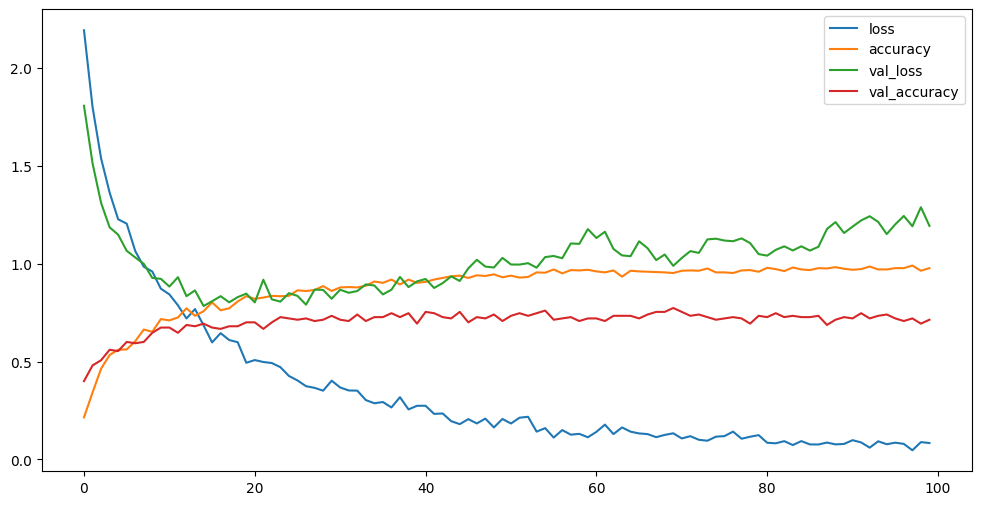

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [10]:
# Plot validation metrics
plot_validation(model_history)

# Display model summary
print(model.summary())

In [11]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

8/8 [==============================] - 0s 8ms/step - loss: 1.3090 - accuracy: 0.6960

Test accuracy: 0.6959999799728394


In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).argmax(axis = 1)

report = classification_report(y_test, y_pred)
print(report)


8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        23
           1       0.86      0.86      0.86        22
           2       0.76      0.74      0.75        35
           3       0.38      0.47      0.42        17
           4       0.75      0.55      0.63        22
           5       0.83      0.86      0.84        28
           6       0.81      0.72      0.76        29
           7       0.62      0.70      0.65        23
           8       0.59      0.62      0.60        21
           9       0.61      0.47      0.53        30

    accuracy                           0.70       250
   macro avg       0.69      0.69      0.68       250
weighted avg       0.70      0.70      0.69       250



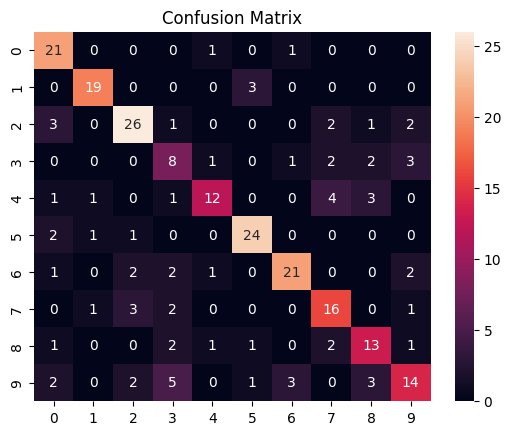

In [13]:
from sklearn import metrics 
import seaborn as sns
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")